# Stroke Prediction

In [66]:
!pip install imbalanced-learn


     -------------------------------------- 235.6/235.6 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: C:\Users\PC\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


### Importing Libraries

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as smi 
import pylab as py 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from yellowbrick.classifier import ROCAUC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from tabulate import tabulate
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.feature_selection import f_regression
warnings.simplefilter('ignore')

### Data Preprocesing

In [2]:
df = pd.read_csv(r'C:/Users/PC/Desktop/ML/Data/stroke_prediction_dataset.csv')
df.head(5)

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [4]:
df.describe()

,Patient ID,Age,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Stress Levels
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,49715.802867,54.035667,0.249000,0.502933,129.445209,27.474302,0.500267,5.022694
std,29000.656642,21.063111,0.432448,0.500008,40.487792,7.230201,0.500017,2.873223
min,1.000000,18.000000,0.000000,0.000000,60.000000,15.010000,0.000000,0.000000
25%,24562.000000,36.000000,0.000000,0.000000,94.517500,21.160000,0.000000,2.540000
50%,49448.000000,54.000000,0.000000,1.000000,128.900000,27.420000,1.000000,5.050000
75%,75112.000000,72.000000,0.000000,1.000000,164.592500,33.720000,1.000000,7.520000
max,99975.000000,90.000000,1.000000,1.000000,200.000000,40.000000,1.000000,10.000000


In [5]:
df.mean()

Patient ID               49715.802867
Age                         54.035667
Hypertension                 0.249000
Heart Disease                0.502933
Average Glucose Level      129.445209
Body Mass Index (BMI)       27.474302
Stroke History               0.500267
Stress Levels                5.022694
dtype: float64

In [6]:
df.median()

Patient ID               49448.00
Age                         54.00
Hypertension                 0.00
Heart Disease                1.00
Average Glucose Level      128.90
Body Mass Index (BMI)       27.42
Stroke History               1.00
Stress Levels                5.05
dtype: float64

In [7]:
df.skew()

Patient ID               0.010071
Age                     -0.004150
Hypertension             1.160987
Heart Disease           -0.011735
Average Glucose Level    0.012069
Body Mass Index (BMI)    0.015617
Stroke History          -0.001067
Stress Levels           -0.012179
dtype: float64

In [8]:
df.isnull().sum()

Patient ID                     0
Patient Name                   0
Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol Levels             0
Symptoms                    2500
Diagnosis                      0
dtype: int64

In [9]:
df.drop('Patient ID', inplace=True, axis=1)
df.drop('Symptoms', inplace=True, axis=1)

In [10]:
df.columns

Index(['Patient Name', 'Age', 'Gender', 'Hypertension', 'Heart Disease',
       'Marital Status', 'Work Type', 'Residence Type',
       'Average Glucose Level', 'Body Mass Index (BMI)', 'Smoking Status',
       'Alcohol Intake', 'Physical Activity', 'Stroke History',
       'Family History of Stroke', 'Dietary Habits', 'Stress Levels',
       'Blood Pressure Levels', 'Cholesterol Levels', 'Diagnosis'],
      dtype='object')

In [11]:
df.shape

(15000, 20)

### Exploratory Data Analysis

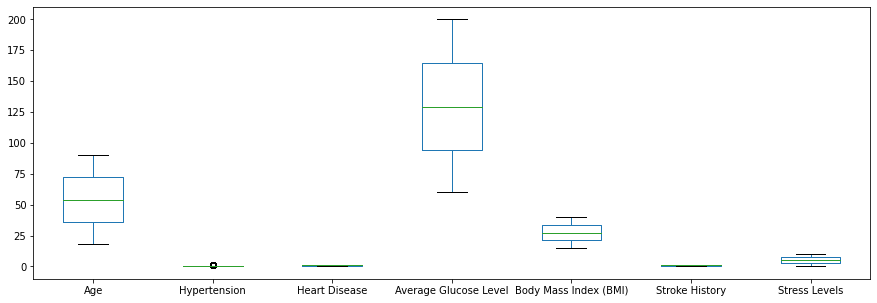

In [12]:
df.boxplot(figsize = (15,5), grid = False)
plt.show()

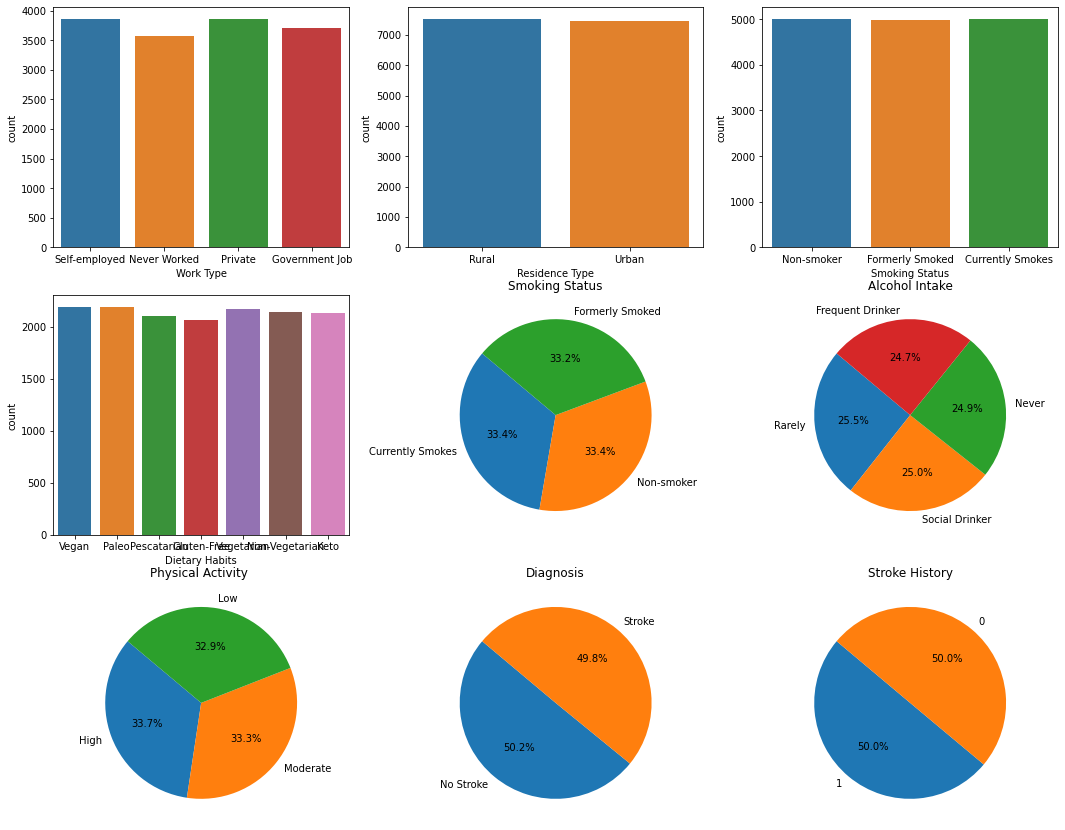

In [14]:
fig, ax = plt.subplots(3, 3, figsize=(18, 15))

sns.countplot(data = df, x ='Work Type', ax=ax[0,0])
sns.countplot(data = df, x ='Residence Type', ax=ax[0,1])
sns.countplot(data = df, x ='Smoking Status', ax=ax[0,2])
sns.countplot(data = df, x ='Dietary Habits', ax=ax[1,0])

ax[1,1].pie(df['Smoking Status'].value_counts(), labels=df['Smoking Status'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[1,1].set_title('Smoking Status')

ax[1,2].pie(df['Alcohol Intake'].value_counts(), labels=df['Alcohol Intake'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[1,2].set_title('Alcohol Intake')

ax[2,0].pie(df['Physical Activity'].value_counts(), labels=df['Physical Activity'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[2,0].set_title('Physical Activity ')

ax[2,1].pie(df['Diagnosis'].value_counts(), labels=df['Diagnosis'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[2,1].set_title('Diagnosis')

ax[2,2].pie(df['Stroke History'].value_counts(), labels=df['Stroke History'].value_counts().index, autopct='%1.1f%%', startangle=140)
ax[2,2].set_title('Stroke History')

plt.show()

### Encoder

In [17]:
columnas_object = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for columna in columnas_object:
    df[columna] = label_encoder.fit_transform(df[columna])
df.head(1)

,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Diagnosis
0,7135,56,1,0,1,1,3,0,130.91,22.37,2,3,2,0,1,5,3.48,1971,4469,1


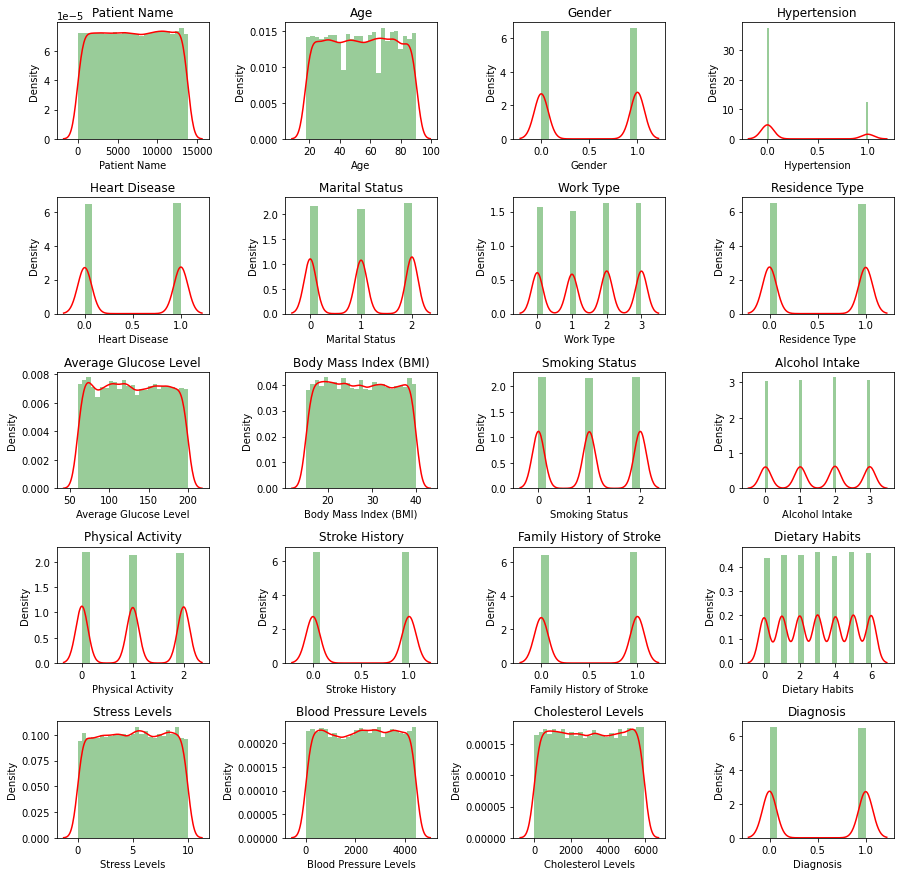

In [21]:
columnas_por_fila = 4

num_columnas = len(df.columns)
num_filas = -(-num_columnas // columnas_por_fila)  

fig, ax = plt.subplots(num_filas, columnas_por_fila, figsize=(15, 15))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, columna in enumerate(df.columns):
    fila_actual = i // columnas_por_fila
    columna_actual = i % columnas_por_fila
    
    sns.distplot(df[columna], ax=ax[fila_actual, columna_actual], color='red', hist_kws={'color': 'green'})
    ax[fila_actual, columna_actual].set_title(columna)
plt.show()

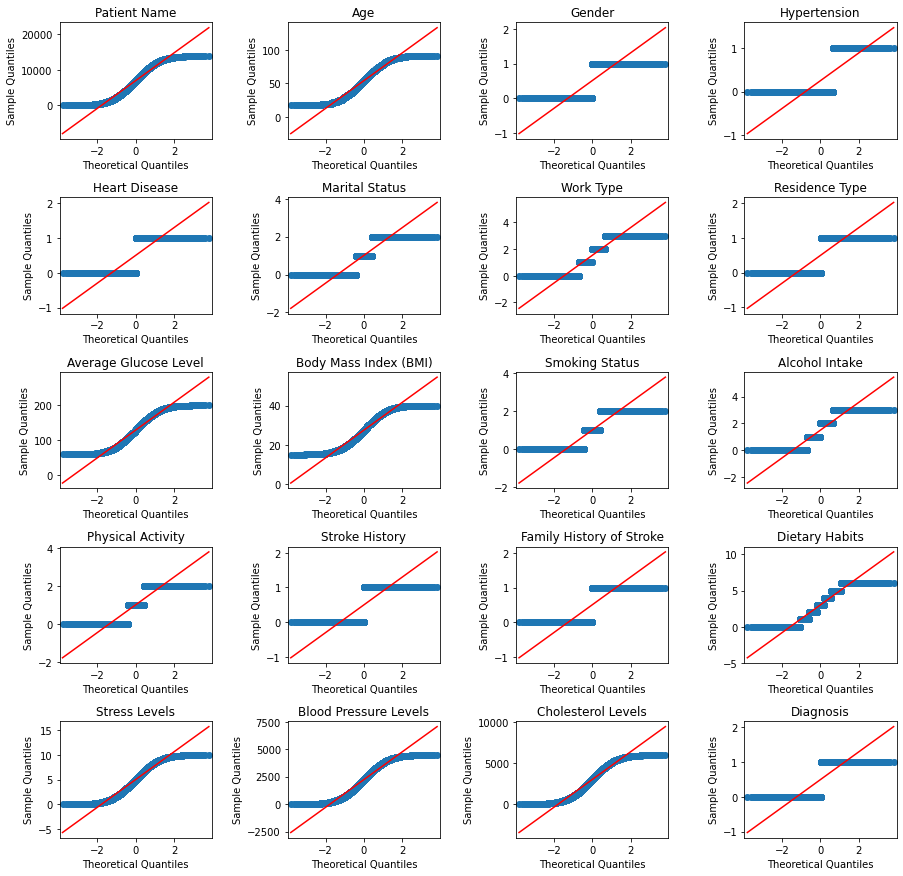

In [24]:
columnas_por_fila = 4

num_columnas = len(df.columns)
num_filas = -(-num_columnas // columnas_por_fila)  

fig, ax = plt.subplots(num_filas, columnas_por_fila, figsize=(15, 15))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, columna in enumerate(df.columns):
    fila_actual = i // columnas_por_fila
    columna_actual = i % columnas_por_fila
    
    smi.qqplot(df[columna], ax=ax[fila_actual, columna_actual],line="r")
    ax[fila_actual, columna_actual].set_title(columna)
plt.show()

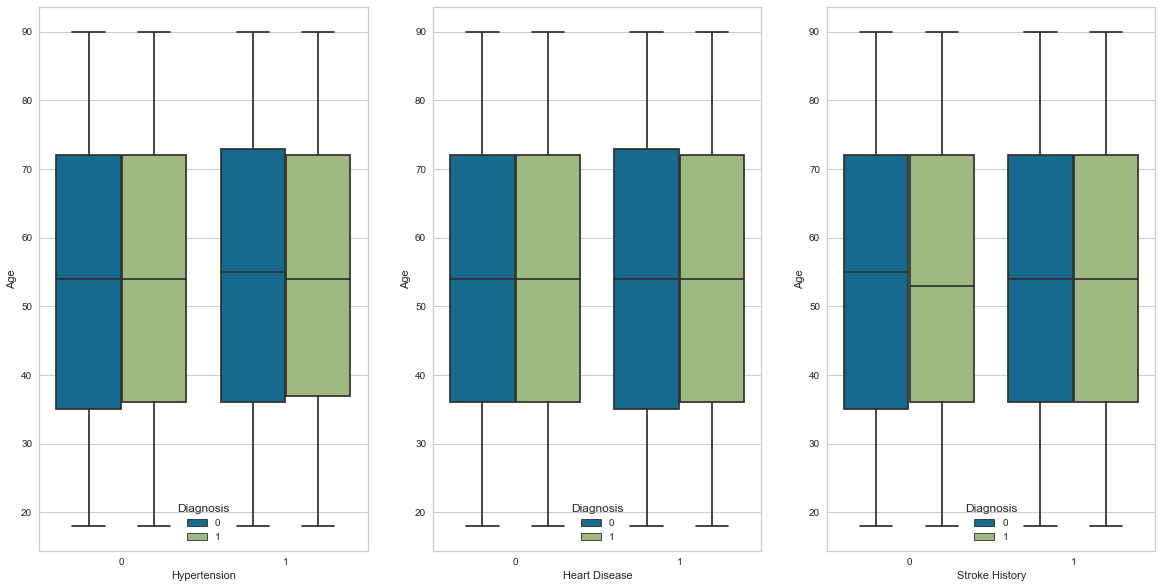

In [84]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

sns.boxplot(data=df, y='Age', x='Hypertension', hue='Diagnosis',ax = ax[0])
sns.boxplot(data=df, y='Age', x='Heart Disease', hue='Diagnosis',ax = ax[1])
sns.boxplot(data=df, y='Age', x='Stroke History', hue='Diagnosis',ax = ax[2])

plt.show()

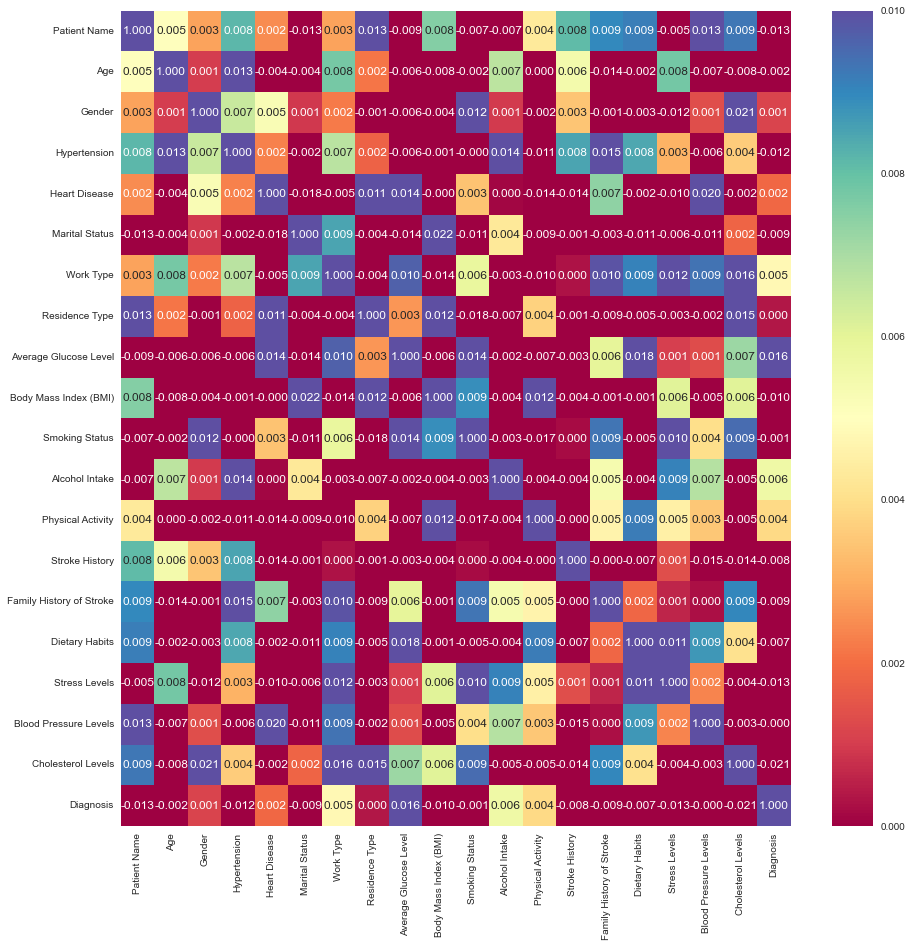

In [101]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, fmt = '.3f', cmap = 'Spectral',  vmin=0, vmax=0.01)
plt.show()

### Select Best Features

In [60]:
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

f_scores, p_values = f_regression(X, y)

feature_scores_df = pd.DataFrame({'Feature': X.columns, 'F_Score': f_scores, 'P_Value': p_values})
feature_scores_df = feature_scores_df.sort_values(by='F_Score', ascending=False)
feature_scores_df

,Feature,F_Score,P_Value
18,Cholesterol Levels,6.744354,0.009414
8,Average Glucose Level,3.663364,0.055640
0,Patient Name,2.565748,0.109222
16,Stress Levels,2.438305,0.118425
3,Hypertension,2.008820,0.156408
9,Body Mass Index (BMI),1.555763,0.212306
14,Family History of Stroke,1.292210,0.255659
5,Marital Status,1.093050,0.295813
13,Stroke History,1.024455,0.311481
15,Dietary Habits,0.646664,0.421321


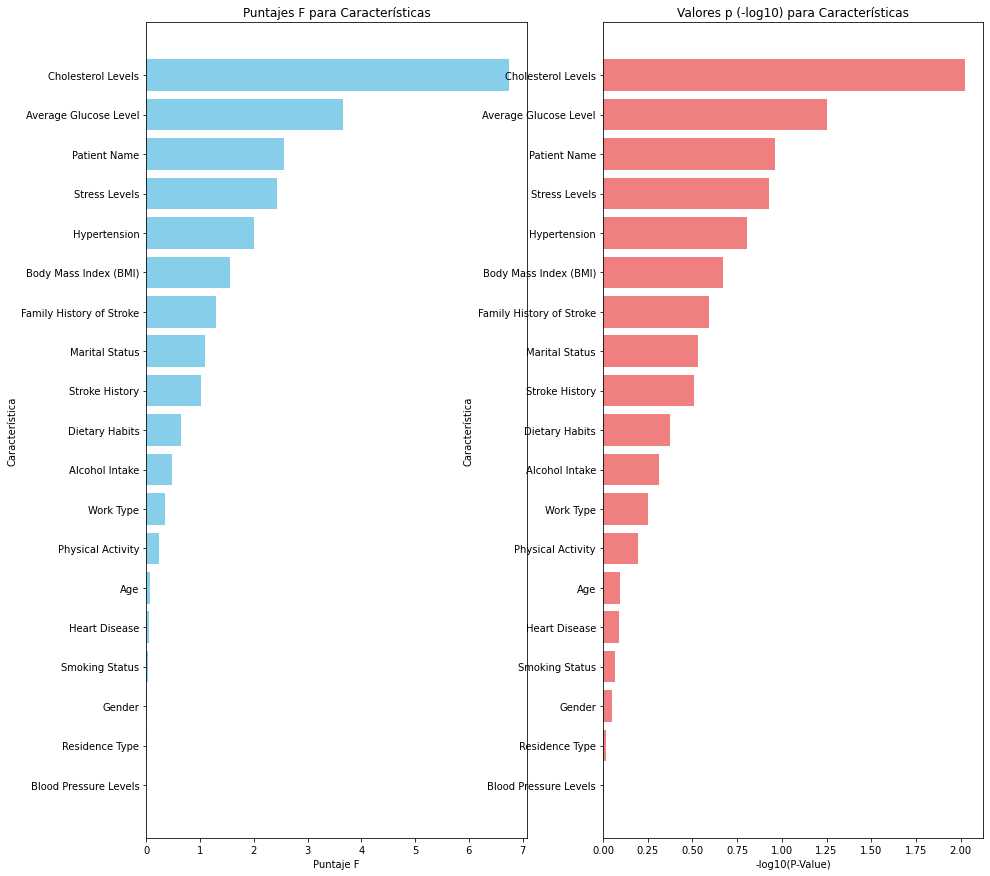

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].barh(feature_scores_df['Feature'], feature_scores_df['F_Score'], color='skyblue')
ax[0].set_xlabel('Puntaje F')
ax[0].set_ylabel('Característica')
ax[0].set_title('Puntajes F para Características')


ax[1].barh(feature_scores_df['Feature'], -np.log10(feature_scores_df['P_Value']), color='lightcoral')
ax[1].set_xlabel('-log10(P-Value)')
ax[1].set_ylabel('Característica')
ax[1].set_title('Valores p (-log10) para Características')

ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.show()

In [114]:
cols = feature_scores_df[feature_scores_df['F_Score']>=1].Feature.to_list()
X_M = df[cols]
X_M.head(1)

,Cholesterol Levels,Average Glucose Level,Patient Name,Stress Levels,Hypertension,Body Mass Index (BMI),Family History of Stroke,Marital Status,Stroke History
0,4469,130.91,7135,3.48,0,22.37,1,1,0


### Modeling and Evaluation

In [115]:
X_M = df[cols]
Y_M = df['Diagnosis']

### Smote

In [116]:
sm = SMOTE(k_neighbors = 2)
X_M, Y_M = sm.fit_resample(X_M, Y_M)

In [117]:
scaler = MinMaxScaler()
x = scaler.fit_transform(X_M)

### Train Test Split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(x, Y_M, test_size=0.3, random_state=42)

### Logistic Regression

In [119]:

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.50      0.57      0.53      2221
           1       0.52      0.45      0.49      2299

    accuracy                           0.51      4520
   macro avg       0.51      0.51      0.51      4520
weighted avg       0.51      0.51      0.51      4520

accuracy:  0.511504424778761
mean_absolute_error:  0.48849557522123893
mean_squared_error:  0.48849557522123893


### Random Forest Classifier

In [120]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           0       0.49      0.54      0.51      2221
           1       0.51      0.47      0.49      2299

    accuracy                           0.50      4520
   macro avg       0.50      0.50      0.50      4520
weighted avg       0.50      0.50      0.50      4520

accuracy:  0.5006637168141593
mean_absolute_error:  0.4993362831858407
mean_squared_error:  0.4993362831858407


### Decision Tree

In [121]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       0.50      0.51      0.50      2221
           1       0.52      0.51      0.51      2299

    accuracy                           0.51      4520
   macro avg       0.51      0.51      0.51      4520
weighted avg       0.51      0.51      0.51      4520

accuracy:  0.5081858407079646
mean_absolute_error:  0.4918141592920354
mean_squared_error:  0.4918141592920354


### KNeighborsClassifier

In [122]:
model_NEG = KNeighborsClassifier(n_neighbors=2)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       0.49      0.75      0.59      2221
           1       0.51      0.26      0.34      2299

    accuracy                           0.50      4520
   macro avg       0.50      0.50      0.47      4520
weighted avg       0.50      0.50      0.47      4520

accuracy:  0.49889380530973454
mean_absolute_error:  0.5011061946902655
mean_squared_error:  0.5011061946902655


1    2299
0    2221
Name: Diagnosis, dtype: int64


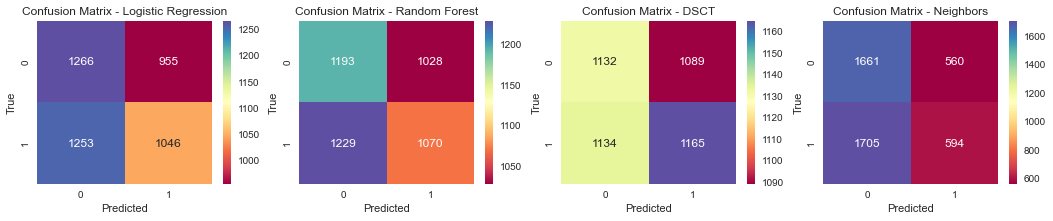

In [123]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
NEG = confusion_matrix(y_test, model_NEG_Pred)

fig, axes = plt.subplots(1, 4, figsize=(18, 3))

sns.heatmap(RLOG, annot=True, cmap='Spectral', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Spectral', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Spectral', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

sns.heatmap(NEG, annot=True, cmap='Spectral', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - Neighbors')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

print(y_test.value_counts())
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Green')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Green')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Green')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Green')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[3], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('Neighbors')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

plt.show()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

visualizer_train_R = ROCAUC(random_forest_model, ax=axs[0])
visualizer_train_R.fit(X_train, y_train)
visualizer_train_R.score(X_test, y_test)


visualizer_train_D = ROCAUC(decision_tree_model, ax=axs[1])
visualizer_train_D.fit(X_train, y_train)
visualizer_train_D.score(X_test, y_test)


visualizer_train_l = ROCAUC(logistic_model, ax=axs[2])
visualizer_train_l.fit(X_train, y_train)
visualizer_train_l.score(X_test, y_test)

axs[0].set_title('Random Forest')
axs[1].set_title('Decision Tree')
axs[2].set_title('Logistic Regression')

axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.show()